In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
# Use p as a symbolic variable
from sympy.abc import p


Text(0, 0.5, '$t_1$ State Probability')

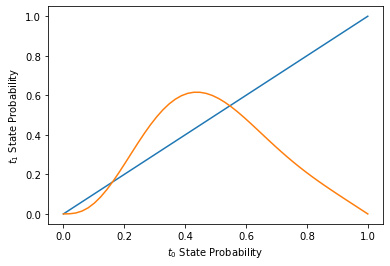

In [31]:
result = (
(1-p) * sum([
comb(8, k) * p**k * (1-p)**(8-k)
for k in range(3, 9)]) +
p * sum([
comb(8, k) * p**k * (1-p)**(8-k)
for k in range(2, 4)]))

binom_fn = sympy.simplify(result)

t = np.linspace(0,1)
f = sympy.lambdify(p, binom_fn, "numpy")

plt.plot(t,t)
plt.plot(t,f(t))
plt.xlabel("$t_0$ State Probability")
plt.ylabel("$t_1$ State Probability")


<ipython-input-46-3c4424704772>:8: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(a, b, N)
<ipython-input-46-3c4424704772>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1)
<ipython-input-46-3c4424704772>:8: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(a, b, N)
<ipython-input-46-3c4424704772>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can 

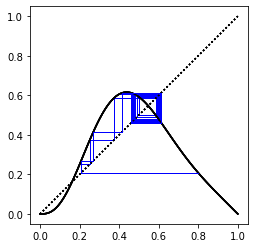

In [46]:
import matplotlib.pyplot as plt
from scipy import cos, linspace

# From https://www.johndcook.com/blog/2020/01/19/cobweb-plots/

def cobweb(f, x0, N, label, a=0, b=1):
    # plot the function being iterated
    t = linspace(a, b, N)
    plt.plot(t, f(t), 'k')

    # plot the dotted line y = x
    plt.plot(t, t, "k:")

    # plot the iterates
    x, y = x0, f(x0)
    for _ in range(N):
        fy = f(y)        
        plt.plot([x, y], [y,  y], 'b', linewidth=1)
        plt.plot([y, y], [y, fy], 'b', linewidth=1)
        x, y = y, fy
        
    plt.axes().set_aspect(1) 

for i in np.arange(0,1,0.2):
    cobweb(f, i, 100, label = f'Starting p = {i}')



In [3]:
from sympy.abc import h,p
# The binomial coefficient function (n choose k)
from scipy.special import comb

i = 0.5
r = 0.5

result = (
    1 - (1 - r)^8 + h - h*sum([comb(8,k)*p^k*(1-p)^(8-k)*(1 - (1 -i)^k) for k in range(1,9)]))

host = sympy.simplify(result)

t = np.linspace(0,1)
f = sympy.lambdify([p,h], host, "numpy")

h = 0.5
f(t)

plt.plot(t, f(t))



TypeError: unsupported operand type(s) for ^: 'Mul' and 'Add'